In [14]:
# import the libraries :
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [15]:
data=pd.read_csv("breast_cancer_data.csv")

In [16]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [18]:
data.shape

(569, 33)

In [19]:
data.drop(['Unnamed: 32'],axis=1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
df=data.copy()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [22]:
#for i in x:
#    print(i,df[i].unique())
 #   print('###############################################################################')

In [23]:
data['diagnosis']=data['diagnosis'].astype('category')
data['diagnosis']=data['diagnosis'].cat.codes

In [24]:
data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [55]:
z=data.drop(['id'],axis=1,inplace=True)

In [56]:
x=data.drop(['diagnosis'],axis=1)

In [57]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
y=data['diagnosis']

In [59]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int8

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [62]:
#model buliding 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [63]:
## Training accuracy
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix
y_pred_train=lr.predict(x_train)
print('Training accuracy',accuracy_score(y_train,y_pred_train))

Training accuracy 0.9538461538461539


In [64]:
# testing 
y_pred_test=lr.predict(x_test)
print('Training accuracy',accuracy_score(y_test,y_pred_test))

Training accuracy 0.9473684210526315


In [65]:
confusion_matrix(y_test,y_pred_test)

array([[69,  3],
       [ 3, 39]], dtype=int64)

In [66]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int8)

In [67]:
#Using PCA

In [68]:
from sklearn.decomposition import PCA

In [69]:
pca=PCA()

In [70]:
print(x_train.shape,x_test.shape)

(455, 30) (114, 30)


In [71]:
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [72]:
print(x_train_pca.shape,x_test_pca.shape)

(455, 30) (114, 30)


In [44]:
print(x_train)

          id  radius_mean  texture_mean  perimeter_mean  area_mean  \
476   911654        14.20         20.53           92.41      618.4   
130   866714        12.19         13.29           79.08      455.8   
246   884448        13.20         17.43           84.13      541.6   
205   879523        15.12         16.68           98.78      716.6   
16    848406        14.68         20.13           94.74      684.5   
..       ...          ...           ...             ...        ...   
552   924084        12.77         29.43           81.35      507.9   
393   903516        21.61         22.28          144.40     1407.0   
75   8610404        16.07         19.65          104.10      817.7   
337   897630        18.77         21.43          122.90     1092.0   
523   917896        13.71         18.68           88.73      571.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
476          0.08931           0.11080         0.05063              0.03058   
1

In [45]:
print(x_train_pca)

[[-2.97382779e+07 -5.21538631e+01 -4.86799363e+00 ...  3.38009717e-04
   2.17930078e-04 -1.69762264e-04]
 [-2.97832179e+07 -3.79986404e+02  3.66955595e+00 ... -2.13462195e-03
  -2.61138371e-04  1.73666977e-04]
 [-2.97654839e+07 -2.87201037e+02  4.70671849e+01 ...  1.39819591e-03
   5.95478012e-04 -3.09839870e-04]
 ...
 [-2.20395279e+07  3.87049572e+02 -3.91524180e+01 ...  1.01302824e-03
   2.47394106e-04 -2.09968484e-05]
 [-2.97523019e+07  1.08915432e+03 -1.44134266e+02 ...  2.36798289e-03
   1.03448832e-03  2.05519395e-04]
 [-2.97320359e+07 -1.85508621e+02  2.05728664e+01 ...  2.73533991e-03
  -8.69136075e-04 -5.22494884e-04]]


In [73]:
explained_var=pca.explained_variance_ratio_

In [74]:
print(explained_var)

[9.83320952e-01 1.47893157e-02 1.68097293e-03 1.16624556e-04
 8.05710370e-05 6.31389874e-06 3.93304005e-06 7.16173023e-07
 3.26595898e-07 1.74390399e-07 6.59767406e-08 1.65200862e-08
 6.83628163e-09 4.60243066e-09 2.10211585e-09 1.24958590e-09
 8.01894759e-10 4.80901068e-10 3.98913017e-10 3.20863193e-10
 1.60258035e-10 1.15480654e-10 7.34705192e-11 5.90307153e-11
 3.32791169e-11 2.36795383e-11 6.53387971e-12 5.71392576e-12
 2.98867991e-12 1.27627914e-12]


In [147]:
pca_new=PCA(n_components=3)
x_train_pca=pca_new.fit_transform(x_train)
x_test_pca=pca_new.transform(x_test)

In [148]:
print(x_train_pca.shape,x_test_pca.shape)

(455, 3) (114, 3)


In [149]:
logit_1=LogisticRegression()
logit_1.fit(x_train_pca,y_train)

LogisticRegression()

In [150]:
## Training accuracy
y_pred_train=logit_1.predict(x_train_pca)
print('Training accuracy',accuracy_score(y_train,y_pred_train))

Training accuracy 0.9318681318681319


In [151]:
## Training accuracy
y_pred_test=logit_1.predict(x_test_pca)
print('Testing accuracy',accuracy_score(y_test,y_pred_test))

Testing accuracy 0.9298245614035088


In [110]:
confusion_matrix(y_test,y_pred_test)

array([[70,  2],
       [ 3, 39]], dtype=int64)

In [81]:
#KNN

In [82]:
#model building 
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [83]:
y_pred=knn.predict(x_test)

In [84]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int8)

In [85]:
# accuracy
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [86]:
# #Training accuracy
y_pred_train=knn.predict(x_train)
print("Training accuracy:",accuracy_score(y_train,y_pred_train))

Training accuracy: 0.9428571428571428


In [87]:
#testing accuracy
y_pred_test=knn.predict(x_test)
print("Testing accuracy:",accuracy_score(y_test,y_pred_test))

Testing accuracy: 0.956140350877193


In [88]:
confusion_matrix(y_test,y_pred_test)

array([[71,  1],
       [ 4, 38]], dtype=int64)

In [116]:
# Naive Bayes Classifier

In [118]:
from sklearn.naive_bayes import GaussianNB
nv=GaussianNB()
nv.fit(x_train,y_train)

GaussianNB()

In [119]:
y_pred=nv.predict(x_test)

In [120]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int8)

In [121]:
print("Training accuracy:",accuracy_score(y_train,nv.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,nv.predict(x_test)))

Training accuracy: 0.9406593406593406
Testing accuracy: 0.9473684210526315


In [ ]:
#SVM

In [122]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [123]:
y_predict=svm.predict(x_test)

In [124]:
print("Training accuracy:",accuracy_score(y_train,svm.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,svm.predict(x_test)))

Training accuracy: 0.9692307692307692
Testing accuracy: 0.956140350877193


In [125]:
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)
y_predict=svm.predict(x_test)
print("Training accuracy:",accuracy_score(y_train,svm.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,svm.predict(x_test)))

Training accuracy: 0.9098901098901099
Testing accuracy: 0.9473684210526315


In [126]:
svm=SVC(kernel='poly')
svm.fit(x_train,y_train)
y_predict=svm.predict(x_test)
print("Training accuracy:",accuracy_score(y_train,svm.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,svm.predict(x_test)))

Training accuracy: 0.9032967032967033
Testing accuracy: 0.9210526315789473


In [127]:
svm=SVC(kernel='sigmoid')
svm.fit(x_train,y_train)
y_predict=svm.predict(x_test)
print("Training accuracy:",accuracy_score(y_train,svm.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,svm.predict(x_test)))

Training accuracy: 0.44835164835164837
Testing accuracy: 0.35964912280701755


In [143]:
error_rate=[]
for i in range(2,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

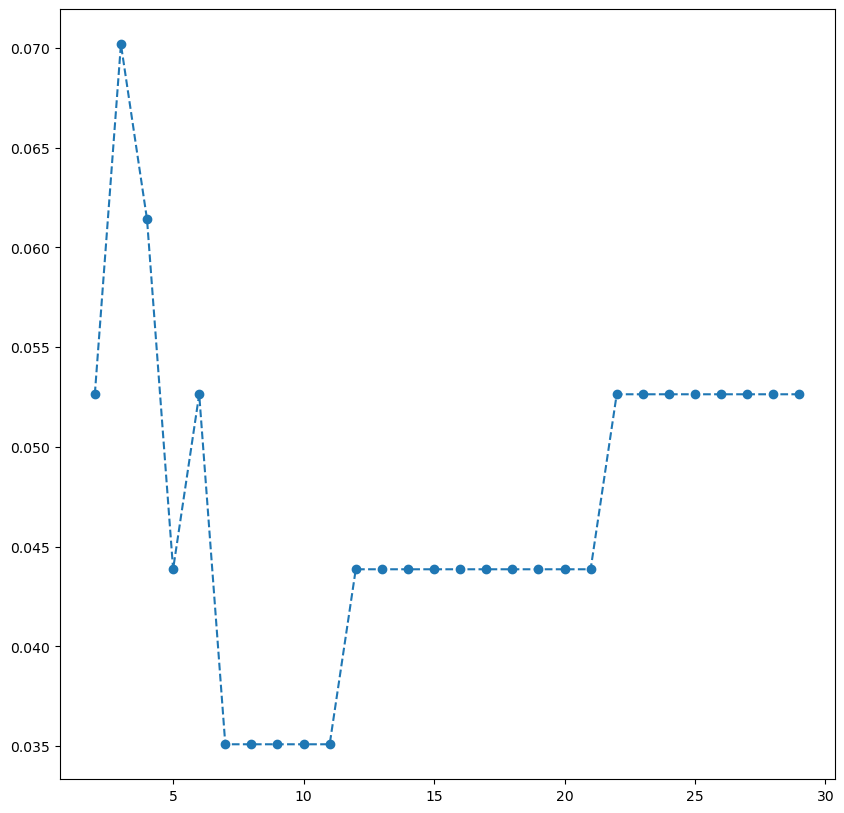

In [144]:
plt.figure(figsize=(10,10))
plt.plot(range(2,30),error_rate,linestyle='dashed',marker='o')

In [ ]:
pca_2=PCA(n_components=4)
x_train_pca=pca_new.fit_transform(x_train)
x_test_pca=pca_new.transform(x_test)

In [ ]:
#model building 
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

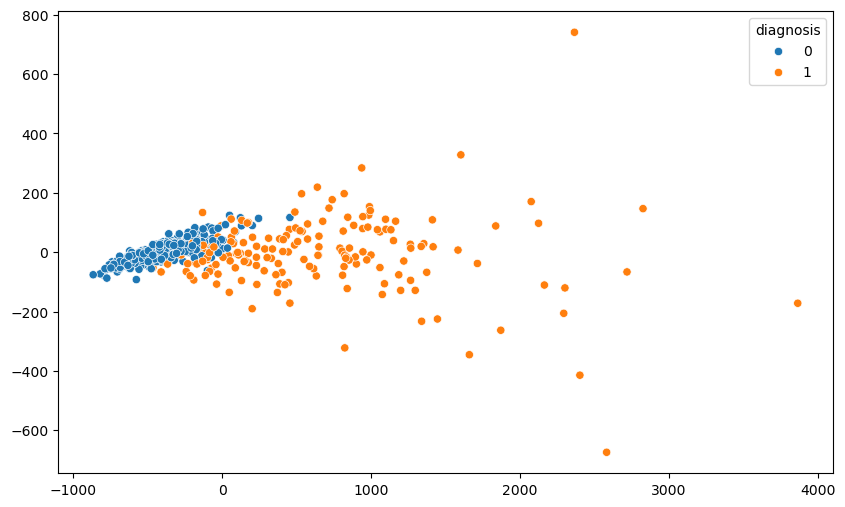

In [146]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train_pca[:,0], y=x_train_pca[:,1], hue=y_train)
plt.show()
            